part 1 = the data visualisation + preprocessing 

In [33]:
# import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline


In [34]:
# read the csv file
df = pd.read_csv('kc_house_data.csv')
df.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [35]:
# check the info of the dataframe 
df.info()
print('*****************************************************')
# check the unique values of the column 'view'
print(df['view'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [36]:
# check the shape of the dataframe
df.shape


(21613, 21)

In [37]:
# check the description of the dataframe
df.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000


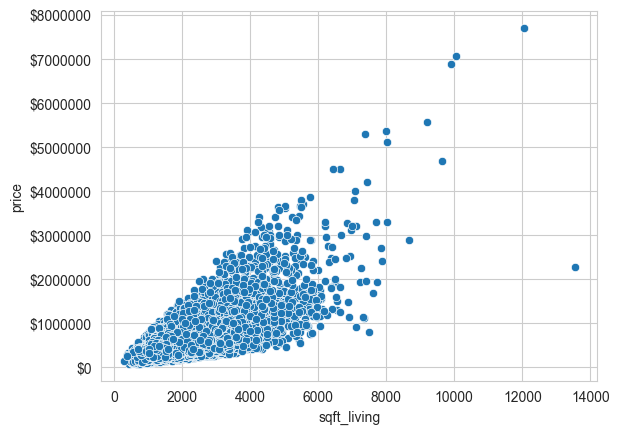

In [38]:
sns.set_style("whitegrid")
# Create a scatterplot of sqft_living by price using Seaborn
sns.scatterplot(x='sqft_living', y='price', data=df)
# Set the x and y axis labels
plt.xlabel('sqft_living')
plt.ylabel('price')
# Set the ticker format of the y-axis to display large numbers in a human-readable format
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()
# we can notice there is a linear relationship between the price and the sqft_living

520
1651359


<Axes: xlabel='sqft_lot', ylabel='price'>

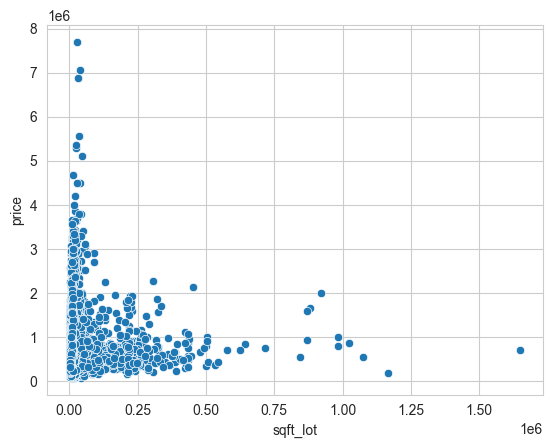

In [39]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

print(df['sqft_lot'].min())
print(df['sqft_lot'].max())
# i have a problem while trying to plot hte whole lot air (sqft_lot ) by price when i do this i get a diifrent 
# scatterplot with a lot of houses that are 0ft while there is no such a thing 
# plot the sqft_lot by price
sns.scatterplot(x='sqft_lot', y='price', data=df)
# can you see the diffrence ?

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [40]:
df['sqft_living'].corr(df['price'])
# => a strong positive correlation 

0.7020350546118002

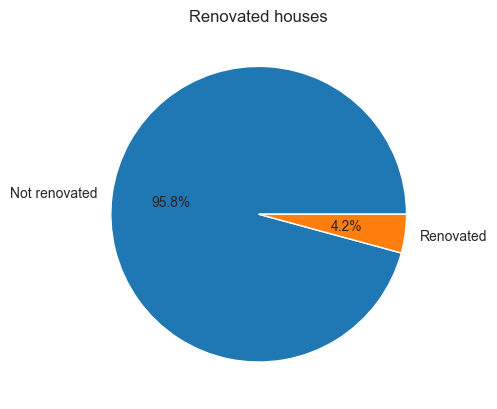

In [41]:
# do a pie using seaborn on the houses that were renovated or not 
# create a new column that will tell us if the house was renovated or not
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
# create a pie chart using plt
plt.pie(df['renovated'].value_counts(), labels=['Not renovated', 'Renovated'], autopct='%1.1f%%')
# # set the title of the pie chart
plt.title('Renovated houses')
# show the pie chart
plt.show()



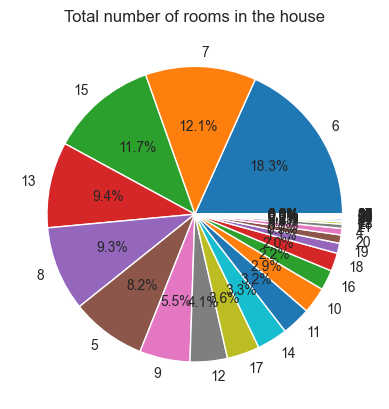

In [42]:
# create a new column that caluculates the total number of rooms in the house
# 2 is for the kitchen and the living room
df['total_rooms'] = (df['bedrooms'] + df['bathrooms'] )* df['floors'] + 2
df['total_rooms'] = df['total_rooms'].astype(int)
# do a pie on the total number of rooms in the house
plt.pie(df['total_rooms'].value_counts(), labels=df['total_rooms'].value_counts().index, autopct='%1.1f%%')
# set the title of the pie chart
plt.title('Total number of rooms in the house')
# show the pie chart
plt.show()


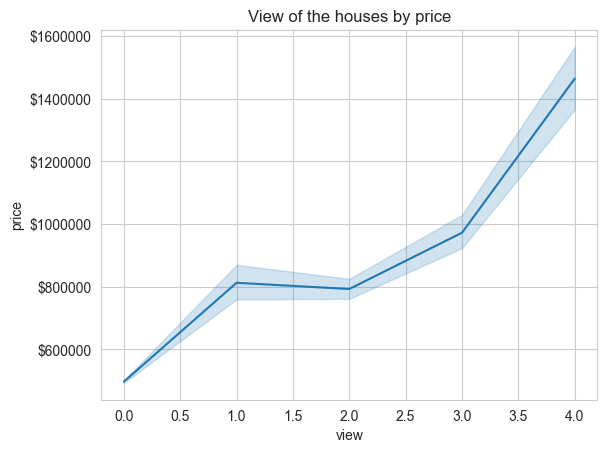

In [43]:
# do a line plot on the view of the houses by price
sns.lineplot(x='view', y='price', data=df)
# set the title of the line plot
plt.title('View of the houses by price')
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
# show the line plot
plt.show()
# make the price in a human readable format



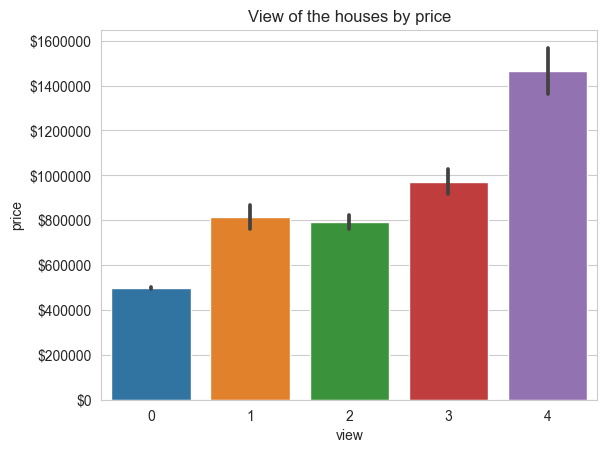

In [44]:
# do a plot on the view of the houses by price
sns.barplot(x='view', y='price', data=df)
# set the title of the line plot
plt.title('View of the houses by price')
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
# show the line plot
plt.show()

In [45]:
# check unique values of the column 'condition'
print('the unique values of the condition are', df['condition'].sort_values().unique())
# check unique values of the column 'grade'
print('the unique values of the grade are', df['grade'].sort_values().unique())
# check unique values of the column 'waterfront'
print('the unique values of the waterfront are', df['waterfront'].sort_values().unique())
# check unique values of the column 'view'
print('the unique values of the view are', df['view'].sort_values().unique())
# check unique values of the column 'view' and sort them in ascending order using another method
print('the unique values of the view are', df['view'].sort_values().unique())



the unique values of the condition are [1 2 3 4 5]
the unique values of the grade are [ 1  3  4  5  6  7  8  9 10 11 12 13]
the unique values of the waterfront are [0 1]
the unique values of the view are [0 1 2 3 4]
the unique values of the view are [0 1 2 3 4]


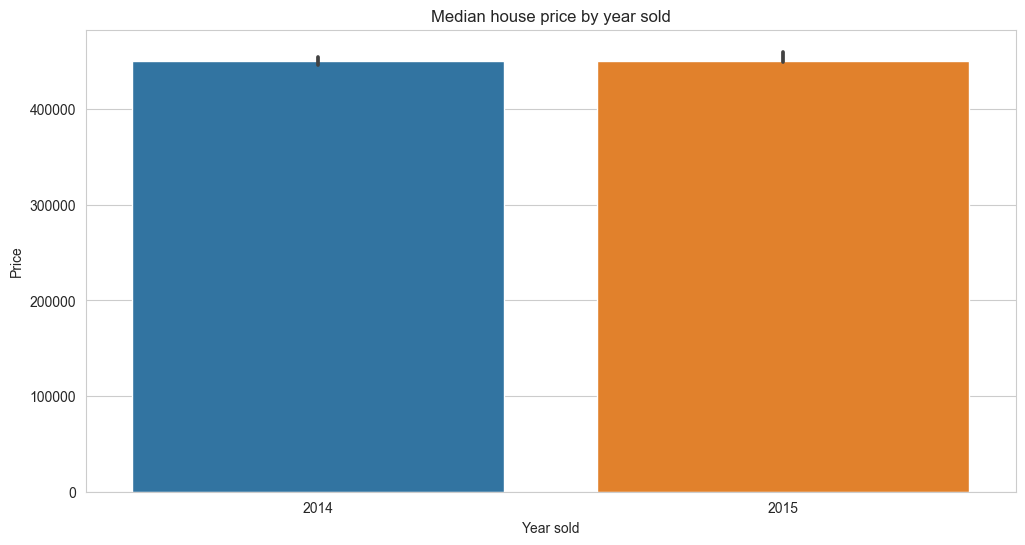

In [46]:
# extract year from date column
df['year_sold'] = pd.DatetimeIndex(df['date']).year
# create a barplot of median price by year sold
plt.figure(figsize=(12,6))
sns.barplot(x='year_sold', y='price', data=df, estimator=np.median)
plt.title('Median house price by year sold')
plt.xlabel('Year sold')
plt.ylabel('Price')
plt.show()


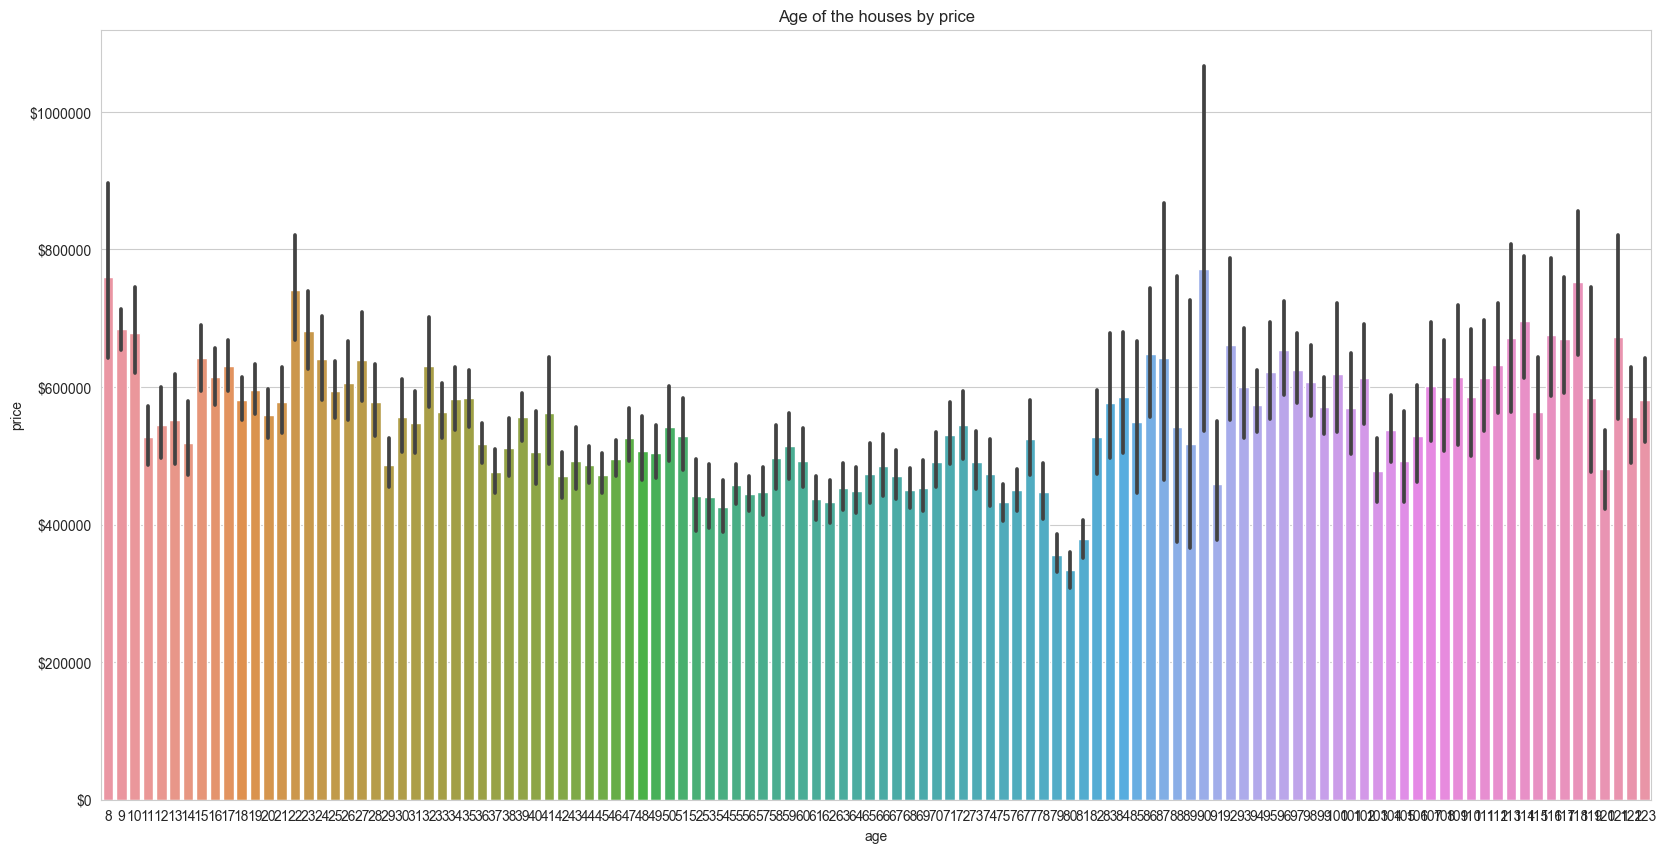

In [47]:

# make a new column that will tell us the age of the house
df['age'] = 2023 - df['yr_built']

# do a barplot of the age of the houses by price
plt.figure(figsize=(20, 10))

sns.barplot(x='age', y='price', data=df)
# set the title of the line plot
plt.title('Age of the houses by price')
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
# show the line plot
plt.show()


# => no relationship between the age of the house and the price of the house



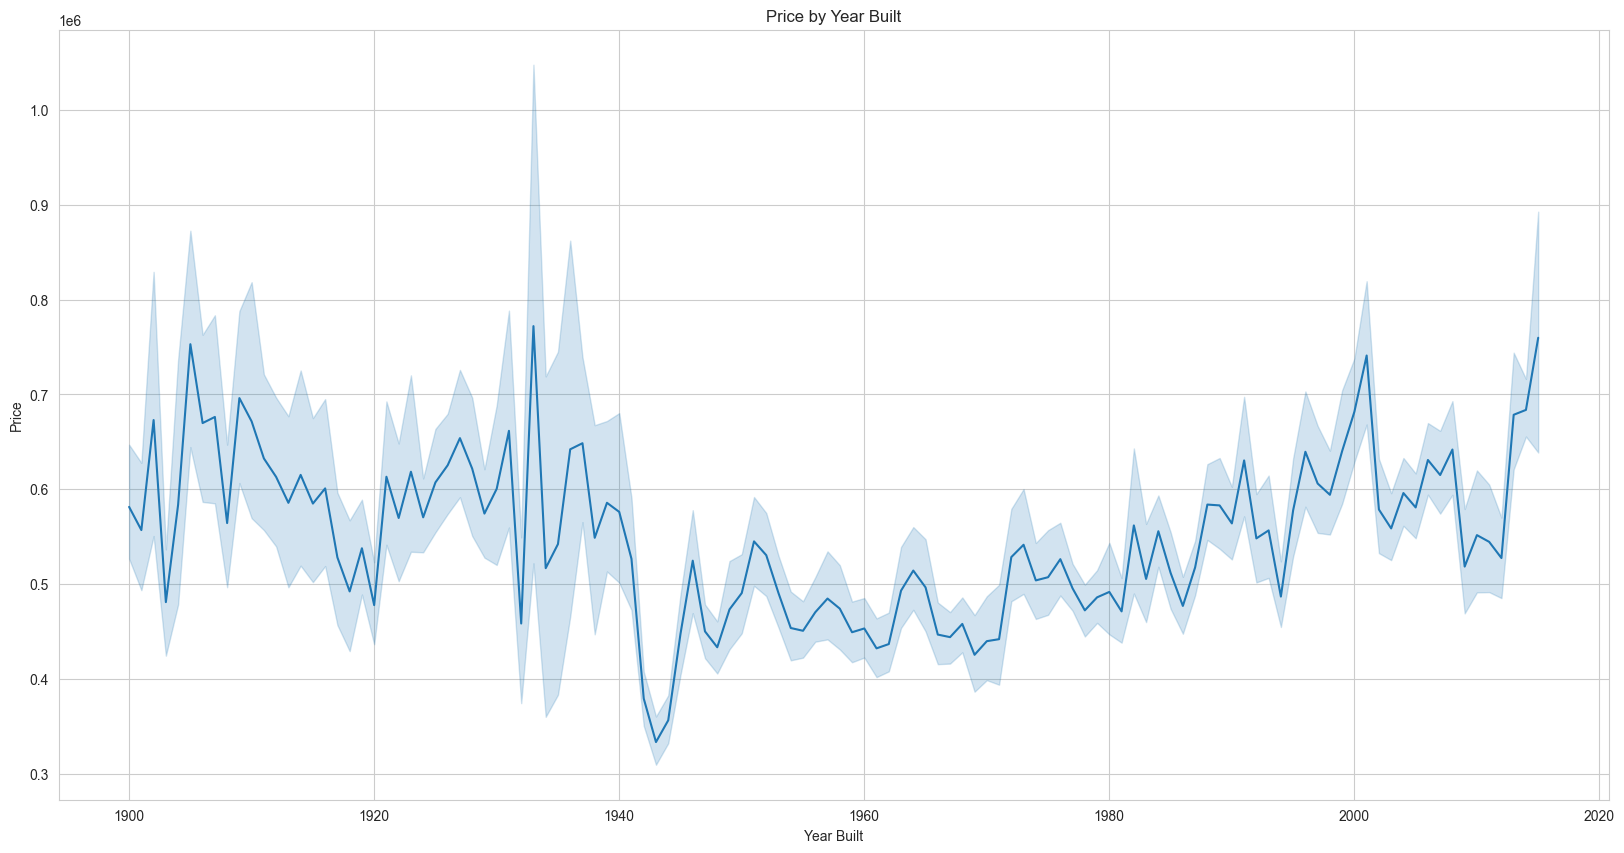

In [48]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='yr_built', y='price', data=df)
plt.title('Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()



<Axes: xlabel='condition', ylabel='count'>

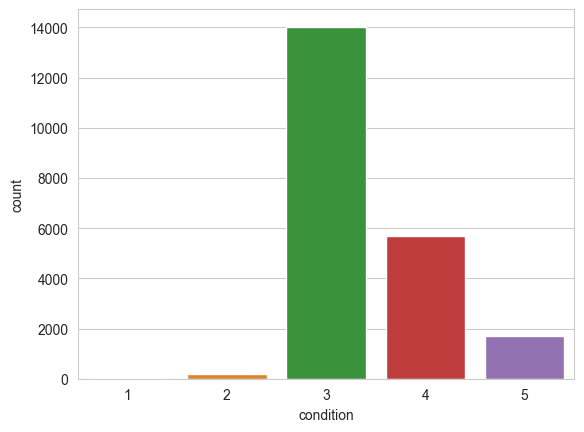

In [49]:
sns.countplot(data=df, x='condition')


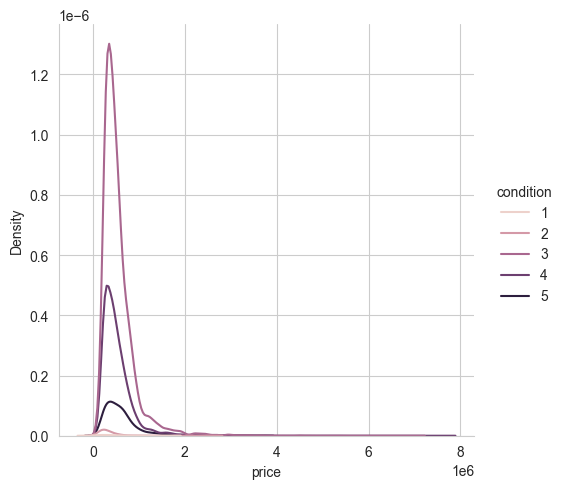

In [50]:
# do a displot on the price of the houses by the condition of the houses
sns.displot(data=df, x='price', hue='condition', kind='kde')

part 2 = rzegression

the mean absolute error is 124724.24799026108
the mean squared error is 40389711924.93318
the r squared value is 0.7120729158954185


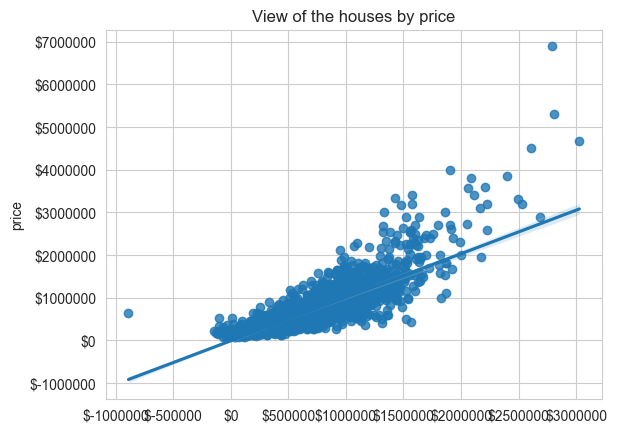

In [67]:
# now we will build a model that will predict the price of the houses
# we will use the linear regression model
# we will use the sqft_living, sqft_lot, bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, renovated, total_rooms, year_sold, age
# let's start by creating a new dataframe that will contain only the columns that we will use
df_model = df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',  'renovated', 'total_rooms', 'year_sold', 'age', 'price']]
# check the head of the new dataframe
df_model.head()
#from sklearn.linear_model import LinearRegression
# create an instance of the linear regression model
model = LinearRegression()
# split the data into training and testing data
from sklearn.model_selection import train_test_split
# create the X and y variables
X = df_model.drop('price', axis=1)
y = df_model['price']
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# fit the model on the training data
model.fit(X_train, y_train)
# now we will evaluate the model
# we will use the mean absolute error, mean squared error and root mean squared error
from sklearn import metrics
# create predictions on the test data
predictions = model.predict(X_test)
# calculate the mean absolute error
print('the mean absolute error is', metrics.mean_absolute_error(y_test, predictions))
# calculate the mean squared error
print('the mean squared error is', metrics.mean_squared_error(y_test, predictions))
# calculate the r squared value
print('the r squared value is', metrics.explained_variance_score(y_test, predictions))
# create a residual plot
sns.regplot(x=predictions, y=y_test)
plt.title('View of the houses by price')
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter) 

Text(0, 0.5, 'Residuals')

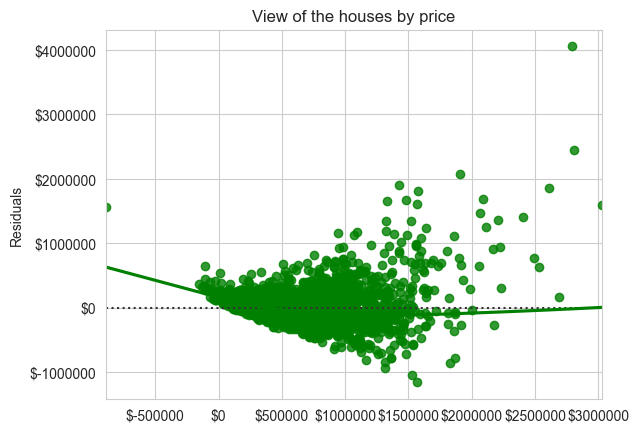

In [68]:
# create the residuals by subtracting the predicted values from the actual values
residuals = y_test - predictions
plt.title('View of the houses by price')
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter) 
# create the residual plot using seaborn
ax = sns.residplot(x=predictions, y=residuals, lowess=True, color="g")
ax.set_ylabel('Residuals')



In [ ]:
# * the loss and gradient
# * the model parameters
# * the lowess parameter
# *  sns.residplot()
# * Why residuals but not actual price vs predicted
# * Get all of the kind of plots and their use + the matrix plot search what’s called box with different colours 
# * Box plots 
# * How to reduce the error , what are the adjustment or the processs that you need to follow in order to determine that 
# * How does the models get ll of the features and then turn them into y point 
# * How the slope is calulted 
# * Did not really understand the logic of r-squared error, squared mean and how to get the best values out of them (again the process
# * Absolute error , mean error 
# * Regression plot, how does it differ from the actual plot (is it just the line because I noticed some points changes even when the order of x and y axis are still the same 
# * how does the y axis get the y label price while i did not specify